In [ ]:
# ASSIGNMENT 4:
# Apply Simple and Multiple Linear Regression techniques to predict the median home value (MEDV) based on one or more predictors.


In [1]:
# Tasks:
# 1.	Load and explore the dataset, perform EDA (exploratory data analysis).

# We will Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv('/HousingData.csv')

In [3]:
#  To view the first few rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
# To check the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# The summary statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Check for  any null values
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


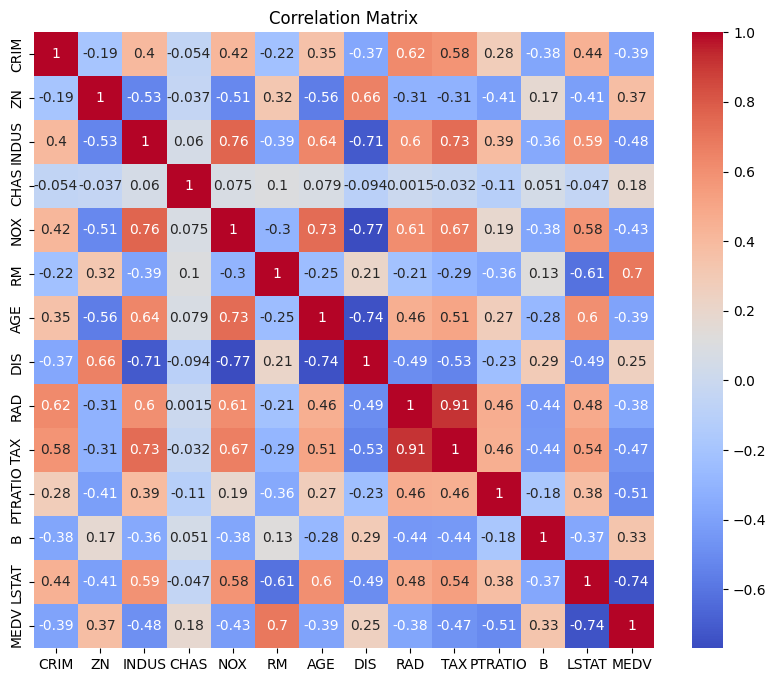

In [9]:
# Show the correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# 2.	Use RM as a single predictor to build a Simple Linear Regression model.

# We define the features and target
X_rm = df[['RM']]     # the predictor
y = df['MEDV']        # the target

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_rm, y, test_size=0.2, random_state=42)

In [11]:
# We create and train the model
lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)

LinearRegression()

In [12]:
# We predict
y_pred_simple = lr_simple.predict(X_test)

In [13]:
# 4.	Evaluate model performance using R², MAE, and RMSE
print("Simple Linear Regression - RM as Predictor")
print("R² Score:", r2_score(y_test, y_pred_simple))
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))

Simple Linear Regression - RM as Predictor
R² Score: 0.3707569232254778
MAE: 4.478335832064149
RMSE: 6.792994578778734


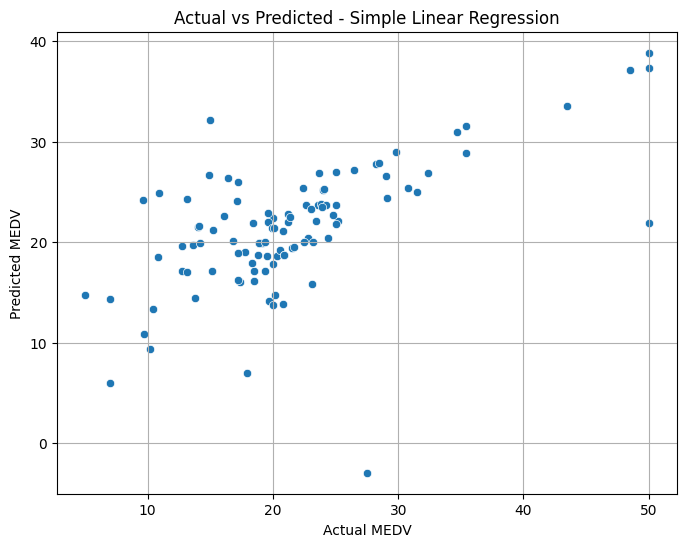

In [19]:
# 	Plot predicted vs actual values

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_simple)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted - Simple Linear Regression")
plt.grid(True)  # Add this line to show gridlines
plt.show()


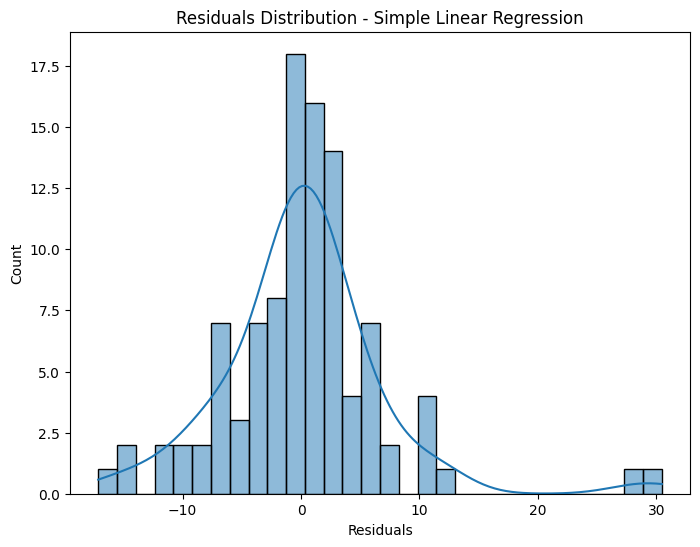

In [20]:
# The residual Plot
residuals = y_test - y_pred_simple
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution - Simple Linear Regression")
plt.xlabel("Residuals")
plt.show()

In [21]:
# Multiple Linear Regression (Top 5 correlated features)

# To compute correlation with MEDV
corr_with_medv = df.corr()['MEDV'].sort_values(ascending=False)

In [22]:
# To select top 5 features excluding MEDV
top_features = corr_with_medv[1:6].index.tolist()
print("Top 5 features:", top_features)

Top 5 features: ['RM', 'ZN', 'B', 'DIS', 'CHAS']


In [23]:
# To prepare data
X_multi = df[top_features]
y = df['MEDV']

In [24]:
# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [47]:
# To evaluate Multiple Linear Regression Model
print("\nMultiple Linear Regression - Top 5 Features as Predictors")
print("R² Score:", r2_score(y_test_m, y_pred_multi))
print("MAE:", mean_absolute_error(y_test_m, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_multi)))


Multiple Linear Regression - Top 5 Features as Predictors
R² Score: 0.451866702168522
MAE: 3.971390824690444
RMSE: 6.340085835864238


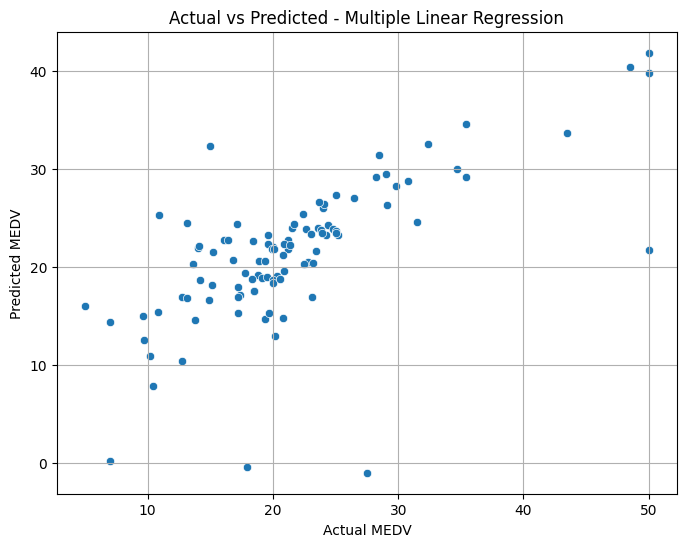

In [48]:
# Plot predicted vs actual values for Multiple Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_m, y=y_pred_multi)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted - Multiple Linear Regression")
plt.grid(True)
plt.show()

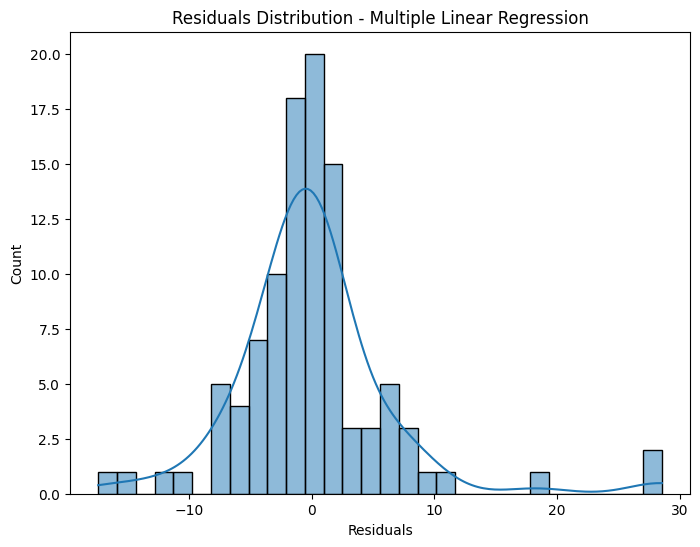

In [49]:
# Residual Plot for Multiple Linear Regression
residuals_multi = y_test_m - y_pred_multi
plt.figure(figsize=(8, 6))
sns.histplot(residuals_multi, bins=30, kde=True)
plt.title("Residuals Distribution - Multiple Linear Regression")
plt.xlabel("Residuals")
plt.show()